In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocessing import *

In [3]:
base_data_path = './revised_raw_dataset/Totaldata_000020_ref_IXIC.csv'
idx = '000020'
df = load_csv_data(base_data_path)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Change,C-Close,C-Change,I-Close,I-Change
Date,,,,,,,,,,
2006-06-15,4840,4890,4780,4880,47913,2.654867,959.55,-0.258655,2144.15,2.954882
2006-06-16,4980,5040,4920,5000,19347,2.459016,955.80,-0.390808,2129.95,-0.662267
2006-06-19,5000,5000,4820,4960,16703,-0.800000,961.20,0.564972,2110.42,-0.916923
2006-06-20,4840,4890,4760,4850,21217,-2.217742,956.65,-0.473367,2107.06,-0.159210
2006-06-21,4760,4870,4760,4840,10010,-0.206186,955.75,-0.094078,2141.20,1.620267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 2006-06-15 to 2022-07-26
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3850 non-null   int64  
 1   High      3850 non-null   int64  
 2   Low       3850 non-null   int64  
 3   Close     3850 non-null   int64  
 4   Volume    3850 non-null   int64  
 5   Change    3850 non-null   float64
 6   C-Close   3850 non-null   float64
 7   C-Change  3850 non-null   float64
 8   I-Close   3850 non-null   float64
 9   I-Change  3850 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 330.9+ KB


In [6]:
high, low, close, volume = df['High'], df['Low'], df['Close'], df['Volume']

In [7]:
for indicator in INDICATORS:
    data = get_indicator(indicator, high=high, low=low, close=close, volume=volume)
    df[indicator] = data

In [8]:
df.head()

,Open,High,Low,Close,Volume,Change,C-Close,C-Change,I-Close,I-Change,...,OBV,MACD,CCI,RSI,BOL_H,BOL_L,ma_5,ma_20,ma_60,ma_120
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-15,4840,4890,4780,4880,47913,2.654867,959.55,-0.258655,2144.15,2.954882,...,47913,0.000000,0.000000,100.000000,4880.000000,4880.000000,NaN,NaN,NaN,NaN
2006-06-16,4980,5040,4920,5000,19347,2.459016,955.80,-0.390808,2129.95,-0.662267,...,67260,9.572650,66.666667,100.000000,5060.000000,4820.000000,NaN,NaN,NaN,NaN
2006-06-19,5000,5000,4820,4960,16703,-0.800000,961.20,0.564972,2110.42,-0.916923,...,50557,13.772615,7.812500,73.584906,5046.444197,4846.889136,NaN,NaN,NaN,NaN
2006-06-20,4840,4890,4760,4850,21217,-2.217742,956.65,-0.473367,2107.06,-0.159210,...,29340,8.131305,-76.328502,41.286645,5042.812094,4802.187906,NaN,NaN,NaN,NaN
2006-06-21,4760,4870,4760,4840,10010,-0.206186,955.75,-0.094078,2141.20,1.620267,...,19330,2.821090,-69.571865,39.585586,5032.237871,4779.762129,4906.0,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 2006-06-15 to 2022-07-26
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3850 non-null   int64  
 1   High      3850 non-null   int64  
 2   Low       3850 non-null   int64  
 3   Close     3850 non-null   int64  
 4   Volume    3850 non-null   int64  
 5   Change    3850 non-null   float64
 6   C-Close   3850 non-null   float64
 7   C-Change  3850 non-null   float64
 8   I-Close   3850 non-null   float64
 9   I-Change  3850 non-null   float64
 10  MFI       3850 non-null   float64
 11  ADI       3850 non-null   float64
 12  OBV       3850 non-null   int64  
 13  MACD      3850 non-null   float64
 14  CCI       3850 non-null   float64
 15  RSI       3850 non-null   float64
 16  BOL_H     3850 non-null   float64
 17  BOL_L     3850 non-null   float64
 18  ma_5      3846 non-null   float64
 19  ma_20     3831 non-null   float64
 20  ma_60     3791 non-n

In [10]:
df = df[119:]  # drop ma_120 nan

In [11]:
df[['Volume'] + INDICATORS].describe()

,Volume,MFI,ADI,OBV,MACD,CCI,RSI,BOL_H,BOL_L,ma_5,ma_20,ma_60,ma_120
count,3.731000e+03,3731.000000,3.731000e+03,3.731000e+03,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,2.719357e+05,51.695564,-2.180055e+07,4.241009e+07,9.215123,-1.480867,49.687895,9638.711453,8030.928322,8845.072903,8834.819887,8808.632449,8756.071987
std,1.023527e+06,19.646963,2.359065e+07,7.426397e+07,377.252594,112.793872,12.572089,4537.707129,3347.685946,3919.270783,3886.227404,3794.148012,3629.906698
min,2.822000e+03,4.888876,-9.981696e+07,-2.421608e+06,-1467.906563,-391.347687,14.295229,4399.052221,3520.015152,4050.000000,4219.500000,4436.500000,4558.125000
25%,4.549550e+04,36.544911,-2.719085e+07,1.697930e+06,-131.971285,-87.811568,40.837004,6205.372594,5421.701481,5822.000000,5822.500000,5812.833333,5854.833333
50%,9.058800e+04,52.576933,-1.533142e+07,9.962231e+06,-13.545344,-4.097042,49.058203,8573.734244,7457.430668,8070.000000,8051.000000,8081.500000,8183.416667
75%,1.894085e+05,67.087514,-8.903137e+06,3.911029e+07,114.139658,80.670965,57.916754,11446.219650,9553.121691,10441.000000,10382.000000,10419.833333,10235.291667
max,1.811075e+07,98.867443,2.874692e+06,2.656805e+08,3389.266632,480.681074,95.775123,31986.749013,22620.371080,28420.000000,24675.000000,23928.333333,21442.083333


In [12]:
columns = ['C-Close', 'I-Close']
test_df = pd.DataFrame(index=df.index)
for column in columns:
    scaler = MinMaxScaler()
    scaler.fit(df[column].values.reshape(-1, 1))
    test_df[column] = scaler.transform(df[column].values.reshape(-1, 1))
    
    with open(os.path.join(SCALER_DIR, column + SCALER_EXT), 'wb') as f:
        pickle.dump(scaler, f)
test_df.head()

,C-Close,I-Close
Date,,
2006-12-11,0.037322,0.079399
2006-12-12,0.032470,0.078638
2006-12-13,0.032395,0.078693
2006-12-14,0.030529,0.080142
2006-12-15,0.033291,0.080369


In [13]:
test_df.tail()

,C-Close,I-Close
Date,,
2022-07-20,0.615511,0.718720
2022-07-21,0.605150,0.729672
2022-07-22,0.610898,0.714424
2022-07-25,0.612555,0.710945
2022-07-26,0.611032,0.696063


In [16]:
with open(os.path.join(SCALER_DIR, 'C-Close' + SCALER_EXT), 'rb') as f:
    scaler = pickle.load(f)
scaler.transform(df['C-Close'].values.reshape(-1, 1))[:5]

array([[0.03732179],
       [0.03246996],
       [0.03239531],
       [0.03052922],
       [0.03329104]])

In [17]:
scaled_df = scale_data(df, idx)
scaled_df.head()
scaled_df[COLUMNS[1:]].describe()

,Open,High,Low,Close,Volume,Change,C-Close,C-Change,I-Close,I-Change
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,0.197781,0.164375,0.199973,0.191084,0.014862,0.000541,0.338216,0.000126,0.286393,0.000517
std,0.147496,0.135307,0.148805,0.148216,0.056524,0.028263,0.139285,0.007247,0.248233,0.014500
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.194719,0.000000,-0.103673,0.000000,-0.123213
25%,0.083613,0.060855,0.084017,0.076169,0.002357,-0.012827,0.274472,-0.003088,0.090618,-0.005081
50%,0.168720,0.136184,0.171551,0.161765,0.004847,0.000000,0.340300,-0.000017,0.217717,0.001069
75%,0.257186,0.218750,0.259476,0.251320,0.010304,0.012103,0.408226,0.003160,0.415142,0.007382
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.299559,1.000000,0.107564,1.000000,0.118059


In [18]:
scaled_df[INDICATORS].describe()

,MFI,ADI,OBV,MACD,CCI,RSI,BOL_H,BOL_L,ma_5,ma_20,ma_60,ma_120
count,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000,3731.000000
mean,0.516956,-0.218799,0.159935,0.002719,-0.003081,0.496879,0.189927,0.236169,0.196761,0.225627,0.224306,0.248635
std,0.196470,0.236765,0.280061,0.111308,0.234654,0.125721,0.164483,0.175268,0.160824,0.189984,0.194653,0.214991
min,0.048889,-1.001801,-0.009132,-0.433104,-0.814152,0.142952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.365449,-0.272898,0.006403,-0.038938,-0.182682,0.408370,0.065476,0.099563,0.072712,0.078365,0.070611,0.076801
50%,0.525769,-0.153872,0.037569,-0.003997,-0.008523,0.490582,0.151324,0.206144,0.164957,0.187309,0.187001,0.214718
75%,0.670875,-0.089355,0.147491,0.033677,0.167826,0.579168,0.255446,0.315864,0.262249,0.301264,0.306966,0.336246
max,0.988674,0.028852,1.001924,1.000000,1.000000,0.957751,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3731 entries, 2006-12-11 to 2022-07-26
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3731 non-null   float64
 1   High      3731 non-null   float64
 2   Low       3731 non-null   float64
 3   Close     3731 non-null   float64
 4   Volume    3731 non-null   float64
 5   Change    3731 non-null   float64
 6   C-Close   3731 non-null   float64
 7   C-Change  3731 non-null   float64
 8   I-Close   3731 non-null   float64
 9   I-Change  3731 non-null   float64
 10  MFI       3731 non-null   float64
 11  ADI       3731 non-null   float64
 12  OBV       3731 non-null   float64
 13  MACD      3731 non-null   float64
 14  CCI       3731 non-null   float64
 15  RSI       3731 non-null   float64
 16  BOL_H     3731 non-null   float64
 17  BOL_L     3731 non-null   float64
 18  ma_5      3731 non-null   float64
 19  ma_20     3731 non-null   float64
 20  ma_60     3731 non-n

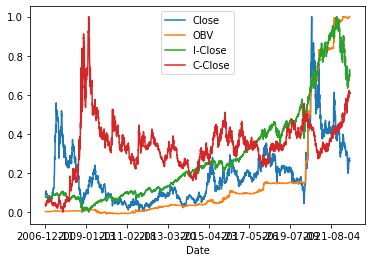

In [20]:
scaled_df[['Close', 'OBV', 'I-Close', 'C-Close']].plot()